# Aims of the script

Adapt code presented by pytrends to,
 - Return search terms for keywords related to "BBQ chicken recipe"
 - Make the search request UK specific
 - Also provide region-specific outcomes

see website https://pypi.org/project/pytrends/


In [1]:
pip install pytrends

Note: you may need to restart the kernel to use updated packages.


In [2]:
# install other things
import pandas as pd

In [3]:
from pytrends.request import TrendReq

#pytrends = TrendReq(hl='en-GB', tz=0) # changed, hl to en-GB & tz to 0 as UK focus

# might be better at reducing too many requests error (420)
pytrends = TrendReq(hl='en-GB', tz=0, 
                    requests_args={
                        'verify': True,
                        'headers': {'User-Agent': 'Safari/26.1'
                                   'Chrome/142.0.7444.162'}
                    }, 
                    retries=3, backoff_factor=0.2)

In [17]:
kw_list = ["BBQ","chicken","recipe"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='GB-ENG', gprop='')

In [10]:
df = pytrends.interest_over_time()
# Returns pandas.Dataframe (but need to define the dataframe)

RetryError: HTTPSConnectionPool(host='trends.google.com', port=443): Max retries exceeded with url: /trends/api/widgetdata/multiline?req=%7B%22time%22%3A+%222020-11-25+2025-11-25%22%2C+%22resolution%22%3A+%22WEEK%22%2C+%22locale%22%3A+%22en-GB%22%2C+%22comparisonItem%22%3A+%5B%7B%22geo%22%3A+%7B%22region%22%3A+%22GB-SCT%22%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22BBQ%22%7D%5D%7D%7D%2C+%7B%22geo%22%3A+%7B%22region%22%3A+%22GB-SCT%22%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22chicken%22%7D%5D%7D%7D%2C+%7B%22geo%22%3A+%7B%22region%22%3A+%22GB-SCT%22%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22recipe%22%7D%5D%7D%7D%5D%2C+%22requestOptions%22%3A+%7B%22property%22%3A+%22%22%2C+%22backend%22%3A+%22IZG%22%2C+%22category%22%3A+0%7D%2C+%22userConfig%22%3A+%7B%22userType%22%3A+%22USER_TYPE_SCRAPER%22%7D%7D&token=APP6_UEAAAAAaSbzHrdh0cVc1NnjStv6wgRtTAMoScoT&tz=0 (Caused by ResponseError('too many 429 error responses'))

In [11]:
# check what the dataframe look like
df.head()

,BBQ,chicken,recipe,isPartial
date,,,,
2020-11-22,3,37,60,False
2020-11-29,3,35,56,False
2020-12-06,3,33,55,False
2020-12-13,2,34,63,False
2020-12-20,3,35,100,False


<Axes: xlabel='date'>

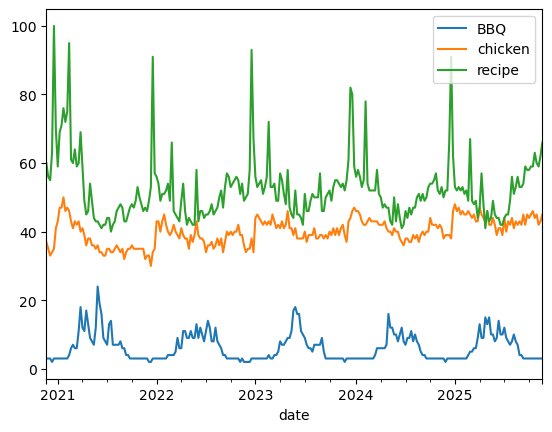

In [12]:
# plot the dataframe
# see for examples https://pandas.pydata.org/docs/getting_started/intro_tutorials/04_plotting.html
#plt.show()
df.plot()
#plt.show()

In [13]:
# write the data
df.to_csv("gapi_bbq_check_recipe_sct_24Nov25.csv")

In [37]:
import time
from pytrends.request import TrendReq

pytrends = TrendReq(
    hl='en-GB',
    tz=0,
    retries=3,
    backoff_factor=0.4,
    #requests_args={
    #    'headers': {
    #        'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 '
    #                      '(KHTML, like Gecko) Chrome/105.0.0.0 Safari/537.36'
    #    }
    #}
)

kw_list = ["BBQ","chicken","recipe"]
def safe_trends(kw_list):
    pytrends.build_payload([kw_list], timeframe='today 5-y', geo='GB-LND')
    time.sleep(4)             # manual delay
    return pytrends.interest_over_time()

df2 = safe_trends("python")
print(df2)


#pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='GB-SCT', gprop='')
#df2 = pytrends.interest_over_time()
df2.plot()
#plt.show()

ResponseError: The request failed: Google returned a response with code 400

In [39]:
from pytrends.request import TrendReq

#pytrends = TrendReq(hl='en-GB', tz=0) # changed, hl to en-GB & tz to 0 as UK focus

# might be better at reducing too many requests error (420)
pytrends = TrendReq(hl='en-GB', tz=0, requests_args={'verify': True}, 
                    retries=3, backoff_factor=0.2)
kw_list = ["BBQ","chicken","recipe"]
# try 'GB-LND' 'GB-ENG'
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='GB-ENG', gprop='')
df = pytrends.interest_over_time()

RetryError: HTTPSConnectionPool(host='trends.google.com', port=443): Max retries exceeded with url: /trends/api/widgetdata/multiline?req=%7B%22time%22%3A+%222020-11-24+2025-11-24%22%2C+%22resolution%22%3A+%22WEEK%22%2C+%22locale%22%3A+%22en-GB%22%2C+%22comparisonItem%22%3A+%5B%7B%22geo%22%3A+%7B%22region%22%3A+%22GB-ENG%22%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22BBQ%22%7D%5D%7D%7D%2C+%7B%22geo%22%3A+%7B%22region%22%3A+%22GB-ENG%22%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22chicken%22%7D%5D%7D%7D%2C+%7B%22geo%22%3A+%7B%22region%22%3A+%22GB-ENG%22%7D%2C+%22complexKeywordsRestriction%22%3A+%7B%22keyword%22%3A+%5B%7B%22type%22%3A+%22BROAD%22%2C+%22value%22%3A+%22recipe%22%7D%5D%7D%7D%5D%2C+%22requestOptions%22%3A+%7B%22property%22%3A+%22%22%2C+%22backend%22%3A+%22IZG%22%2C+%22category%22%3A+0%7D%2C+%22userConfig%22%3A+%7B%22userType%22%3A+%22USER_TYPE_SCRAPER%22%7D%7D&token=APP6_UEAAAAAaSXFimM2igA6A8Qki9-7xY4NAIvwrukK&tz=0 (Caused by ResponseError('too many 429 error responses'))

# Next: extract some sort of regional data

In [23]:
dfr = pytrends.interest_by_region(resolution='DMA', inc_low_vol=True, inc_geo_code=True)

In [24]:
dfr.head()

,coordinates,BBQ,chicken,recipe
geoName,,,,
Abbots Langley,"{'lat': 51.707275, 'lng': -0.4183259}",0,0,0
Adderbury,"{'lat': 52.017428, 'lng': -1.315045}",0,0,0
Addlestone,"{'lat': 51.369813, 'lng': -0.488641}",0,0,0
Amesbury,"{'lat': 51.1679201, 'lng': -1.7629783}",0,0,0
Ampthill,"{'lat': 52.0272503, 'lng': -0.4951417}",0,0,100


In [20]:
# write the data
dfr.to_csv("gapi_bbq_check_recipe_region_24Nov25.csv")

In [12]:
dfr = pytrends.interest_by_region(resolution='REGION', inc_low_vol=True, inc_geo_code=False)

In [13]:
dfr.head()

,BBQ,chicken,recipe
geoName,,,
Abbots Langley,0,0,0
Adderbury,0,0,0
Addlestone,0,0,0
Amesbury,0,0,0
Ampthill,0,0,0


In [16]:
dfr3 = pytrends.interest_by_region(resolution='DMA', inc_low_vol=True, inc_geo_code=False)

In [17]:
dfr3.head()

,BBQ,chicken,recipe
geoName,,,
Abbots Langley,0,0,0
Adderbury,0,0,0
Addlestone,0,0,0
Amesbury,0,0,0
Ampthill,0,0,100


So the temporal element has gone... maybe better to use 